In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from utils import *

(-0.5, 3599.5, 1800.5, -0.5)

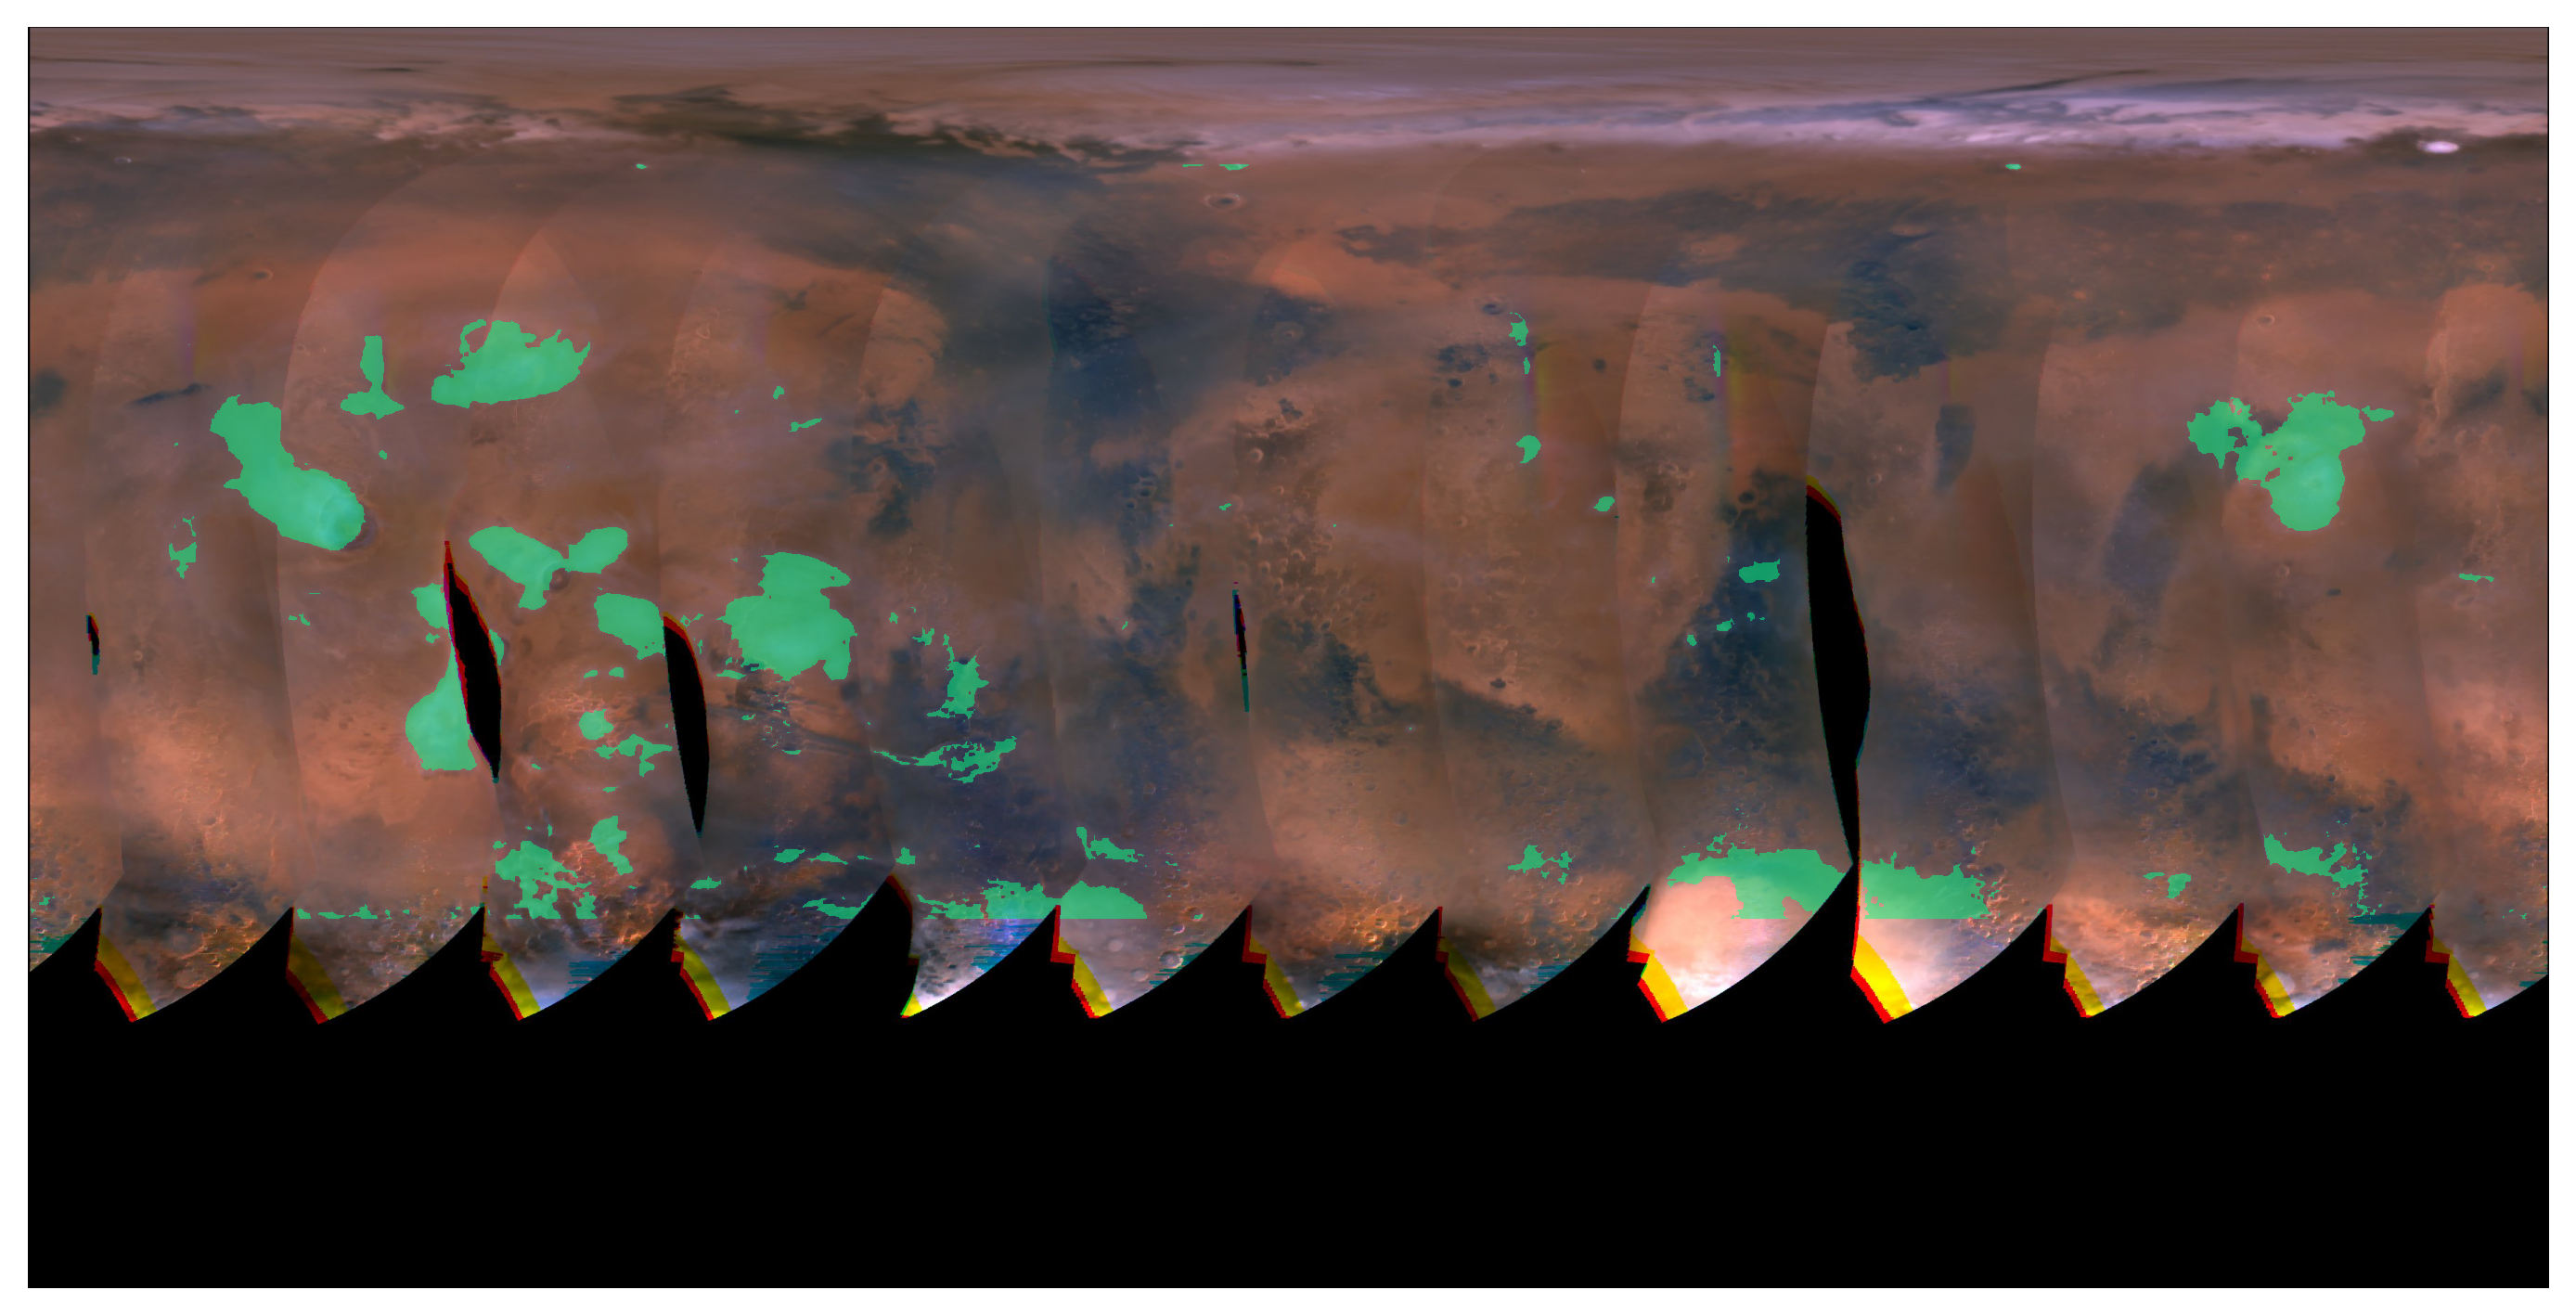

In [4]:
PATH_TO_PREDS = './data/preds/'
SUBPHASE = 'P19'
DAY = 5

fig = plt.figure(num=None, figsize=(12, 6), dpi=300, facecolor='w', edgecolor='k')
ax = fig.add_subplot()

# path as follows: path/to/predMDGM/**/*.jpg
mdgm = Image.open(os.path.join(PATH_TO_PREDS, SUBPHASE[0], SUBPHASE, 'mdgms', '{}_day{}.jpg'.format(SUBPHASE,"{:02d}".format(DAY))))
cloudMask = getCloudMask(os.path.join(PATH_TO_PREDS, SUBPHASE[0], SUBPHASE, 'cloudmasks', 'cloudmask_{}_day{}.ncdf'.format(SUBPHASE,"{:02d}".format(DAY))))

ax.imshow(mdgm)
ax.imshow(np.ma.masked_where(cloudMask < 1, cloudMask), vmin=0, vmax=1, cmap='winter', alpha=.5)
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

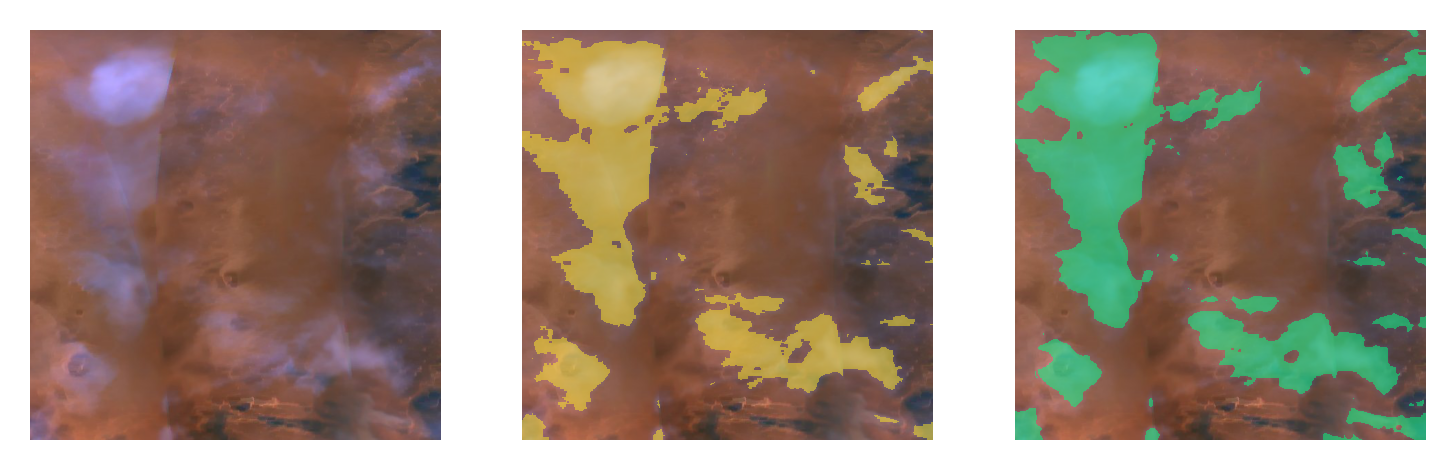

In [3]:
# plots a cropped MDGM with the train and prediction masks side-by-side
# left is raw mdgm, middle is mdgm with the training mask, and right is mdgm with the model's mask
PATH_TO_PREDS = './data/preds/'
PATH_TO_TRAIN = './data/train/'
SUBPHASE = 'P01'
DAY = 19

# Crop coordinates (axis 0 = {0,1801}, axis 1 = {0,3600}). Format: (top x, top y, bottom x, bottom y)
loc = (600,400,1200,1000) 

fig = plt.figure(num=None, figsize=(6, 4), dpi=300, facecolor='w', edgecolor='k')
axs = fig.subplots(1,3)

mdgm = Image.open(os.path.join(PATH_TO_PREDS, SUBPHASE[0], SUBPHASE, 'mdgms', '{}_day{}.jpg'.format(SUBPHASE, "{:02d}".format(DAY))))
subMDGM = mdgm.crop(loc)

cloudMaskTrain = getCloudMask(os.path.join(PATH_TO_TRAIN, SUBPHASE, 'cloudmask', 'cloudmask_{}day{}.ncdf'.format(SUBPHASE, "{:02d}".format(DAY))))[loc[1]:loc[3],loc[0]:loc[2],...]

cloudMaskPreds = getCloudMask(os.path.join(PATH_TO_PREDS, SUBPHASE[0], SUBPHASE, 'cloudmasks', 'cloudmask_{}_day{}.ncdf'.format(SUBPHASE, "{:02d}".format(DAY))))[loc[1]:loc[3],loc[0]:loc[2],...]

axs[0].imshow(subMDGM)

axs[1].imshow(subMDGM)
axs[1].imshow(np.ma.masked_where(cloudMaskTrain < 1, cloudMaskTrain), vmin=0, vmax=1, cmap='viridis', alpha=.5)

axs[2].imshow(subMDGM)
axs[2].imshow(np.ma.masked_where(cloudMaskPreds < 1, cloudMaskPreds), vmin=0, vmax=1, cmap='winter', alpha=.5)

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')